<a href="https://colab.research.google.com/github/kimpyeong-an/digital/blob/main/ch07_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


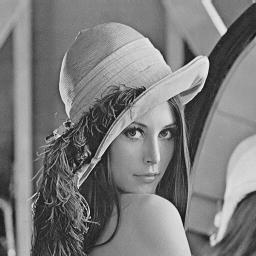

In [3]:
img = cv2.imread('/content/gdrive/My Drive/di/Images/lena256.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow (gimg, cmap= 'gray')
cv2_imshow(gimg)

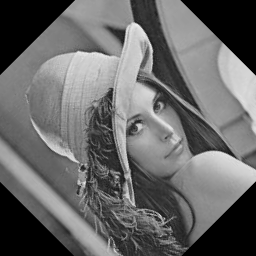

In [4]:
M = cv2.getRotationMatrix2D((128,128),45,1)
outImg = cv2.warpAffine(gimg,M,(256,256))
cv2_imshow(outImg)

In [5]:
print(M)
print(M.shape)

[[  0.70710678   0.70710678 -53.01933598]
 [ -0.70710678   0.70710678 128.        ]]
(2, 3)


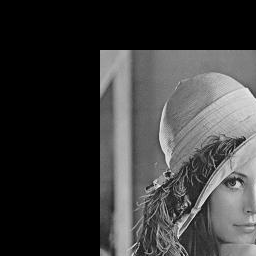

In [6]:
# 평행이동 행렬 (x 방향으로 +100, y 방향으로 +50 이동)
M = np.float32([[1, 0, 100],
                [0, 1, 50]])
# 이미지 변환
outImg = cv2.warpAffine(gimg, M, (256, 256))
# 결과 출력
cv2_imshow(outImg)

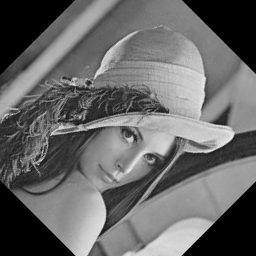

In [7]:
M = cv2.getRotationMatrix2D((128,128),-45,1)
outImg = cv2.warpAffine(gimg,M,(256,256))
cv2_imshow(outImg)

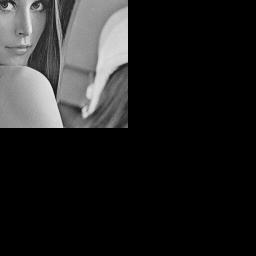

In [8]:
M1 = np.float32([[1, 0, -128],[0, 1, -128]])
outImg1 = cv2.warpAffine(gimg,M1,(256,256))
cv2_imshow(outImg1)

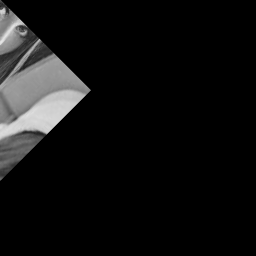

In [9]:
M2 = cv2.getRotationMatrix2D((0,0),-45,1)
outImg2 = cv2.warpAffine(outImg1,M2,(256,256))
cv2_imshow(outImg2)

In [10]:
print(M1)
print(M2)

[[   1.    0. -128.]
 [   0.    1. -128.]]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


In [11]:
N1 = np.float32([
    [M1[0,0], M1[0,1], M1[0,2]],
    [M1[1,0], M1[1,1], M1[1,2]],
    [0, 0, 1]
])

N2 = np.float32([
    [M2[0,0], M2[0,1], M2[0,2]],
    [M2[1,0], M2[1,1], M2[1,2]],
    [0, 0, 1]
])

N3 = np.float32([
    [M3[0,0], M3[0,1], M3[0,2]],
    [M3[1,0], M3[1,1], M3[1,2]],
    [0, 0, 1]
])

print(N1)
print(N2)
print(N3)

NameError: name 'M3' is not defined

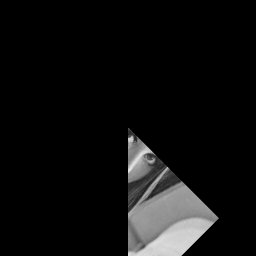

In [12]:
M3 = np.float32([[1, 0, 128],[0, 1, 128]])
outImg3 = cv2.warpAffine(outImg2,M3,(256,256))
cv2_imshow(outImg3)

In [13]:
# N4와 N5는 이전 실행에서 이미 정의되어 있다고 가정합니다.
# N4 = np.dot(N3, N2)
# N5 = np.dot(N4, N1)

# 오류를 발생시킨 N6의 잘못된 정의
# 3x3 행렬 N5에서 첫 두 행의 요소들을 1D 배열로 잘못 나열했습니다.
N6_error = np.float32([N5[0,0],N5[0,1],N5[0,2],N5[1,0],N5[1,1],N5[1,2]])
print(f"N6_error shape: {N6_error.shape}")

# 이 코드를 실행하면 'Assertion failed' 오류가 발생합니다.
# (N0.type() == CV_32F || N0.type() == CV_64F) && N0.rows == 2 && N0.cols == 3
# cv2.warpAffine(gimg, N6_error, (256, 256))

NameError: name 'N5' is not defined

In [14]:
# N4와 N5는 이전 실행에서 이미 정의되어 있다고 가정합니다.
# 이 코드는 이전의 잘못된 N6 정의를 재현합니다.
N6_error_reproduced = np.float32([N5[0,0],N5[0,1],N5[0,2],N5[1,0],N5[1,1],N5[1,2]])
print(f"N6_error_reproduced shape: {N6_error_reproduced.shape}")

# 이 코드를 실행하면 'Assertion failed' 오류가 발생합니다.
# (N0.type() == CV_32F || N0.type() == CV_64F) && N0.rows == 2 && N0.cols == 3
# 이는 cv2.warpAffine이 2x3 형태의 변환 행렬을 기대하기 때문입니다.
cv2.warpAffine(gimg, N6_error_reproduced, (256, 256))

NameError: name 'N5' is not defined